<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

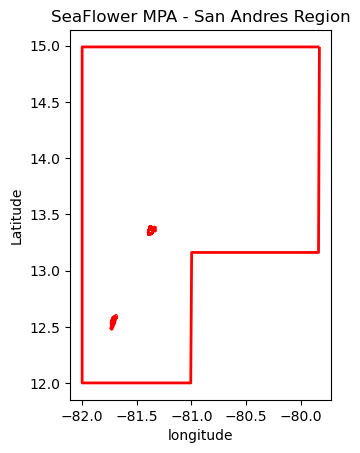

In [1]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

gdf = gp.read_file("SeaFlowerMPA.shp")

plt.figure(figsize = (10,10))
gdf.plot(color='none', edgecolor= 'red', linewidth = 2)
plt.title("SeaFlower MPA - San Andres Region")
plt.xlabel("longitude")
plt.ylabel("Latitude")
plt.show

0.00341802 149.0


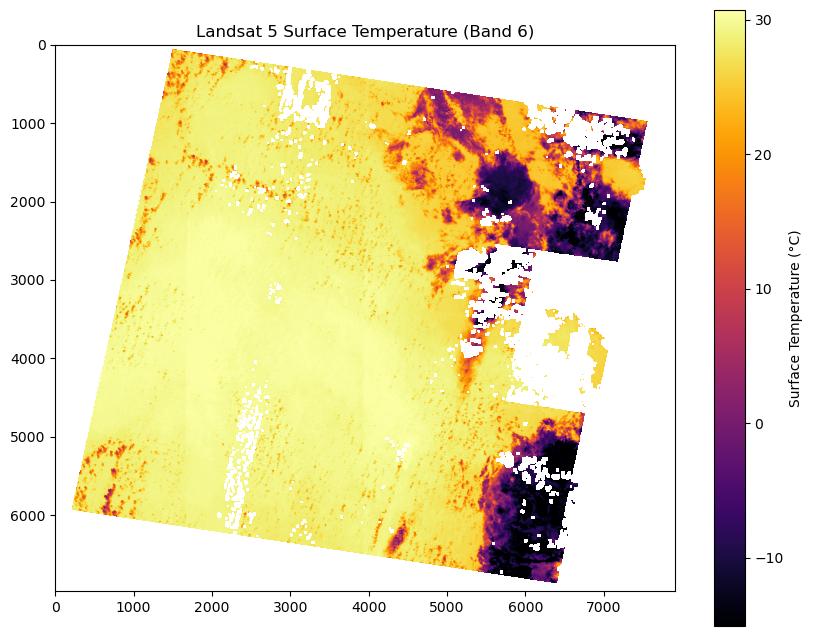

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

tif_path = "LT05_L2SP_014051_20110103_20200823_02_T1_ST_B6.TIF"

#Landsat 5 imagery for a wide region around the San Andres region from Jan 3rd, 2011. 

with rasterio.open(tif_path) as src:
    DN = src.read(1).astype("float32")
    meta = src.tags(1)

    # Read scale & offset from metadata 
    scale = float(meta.get("SCALE", 0.00341802))
    offset = float(meta.get("OFFSET", 149.0))
    print(scale, offset)

temp_K = DN * scale + offset

# Convert Kelvin to Celsius directly using metadata scale
temp_C = temp_K - 273.15  

# Masking out no-data values
temp_C[temp_C < -50] = np.nan

# AUTO SCALE limits using percentiles
vmin, vmax = np.nanpercentile(temp_C, (2, 98))

plt.figure(figsize=(10, 8))
plt.imshow(temp_C, cmap='inferno', vmin=vmin, vmax=vmax)
plt.colorbar(label="Surface Temperature (°C)")
plt.title("Landsat 5 Surface Temperature (Band 6)")
plt.show()

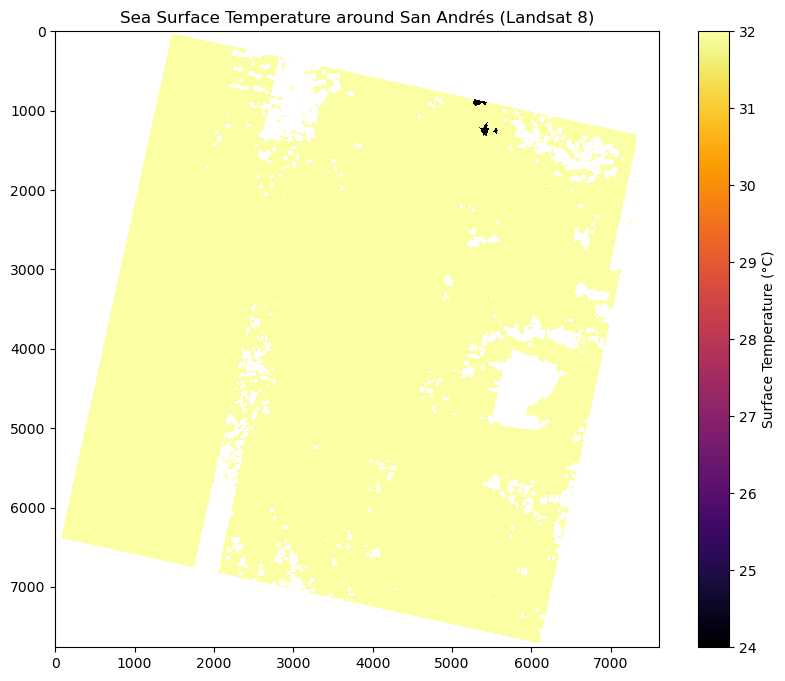

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

tif_path = "LC08_L2SP_014051_20210114_20210308_02_T1_ST_B10.TIF"

with rasterio.open(tif_path) as src:
    DN = src.read(1).astype("float32")
    scale = src.scales[0]
    offset = src.offsets[0]

# Convert DN → Kelvin → Celsius
temp_K = DN * scale + offset
temp_C = temp_K - 273.15

# Mask obvious no-data (huge negatives)
temp_C[temp_C < -50] = np.nan

# Stretch the display to ocean range
plt.figure(figsize=(10, 8))
plt.imshow(temp_C, cmap='inferno', vmin=24, vmax=32)
plt.colorbar(label="Surface Temperature (°C)")
plt.title("Sea Surface Temperature - San Andrés (Landsat 8)")
plt.show()
